In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

In [14]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

def leap(periods, units):
    if (periods & 4 == 0) and 'days' == units:
        leap = periods/4
    else:
        leap = 0

    return leap

def units(units):
    time = {
        'minutes': 60,
        'hours': 24,
        'days': 365
    }
    return time.get(units, 365)

def generate_dates(time):
    base = datetime.datetime.today()
    date_list = [base - datetime.timedelta(days=int(x)) for x in time]
    
    return date_list

def series(periods=8, baseline=10, trend_val=0.1, 
           amplitude=40, slope=0.01, 
           noise_level=2, seed=42):
    
    time = np.arange(periods * units('days') + leap(periods, 'days'), dtype="float32")
    # Create the series
    series = baseline + trend(time, trend_val) + seasonality(time, units('days'), amplitude)
    # Update with noise
    series += noise(time, noise_level, seed)
    
    return generate_dates(time), series[::-1]

In [15]:
values = {
    'periods':20,
    'baseline':100,
    'trend_val':0.1,
    'amplitude': 400,
    'slope': 0.01,
    'noise_level': 2,
    'seed':50
}


series = series(**values)


df = pd.DataFrame({
    'ds': series[0],
    'y': series[1]
})




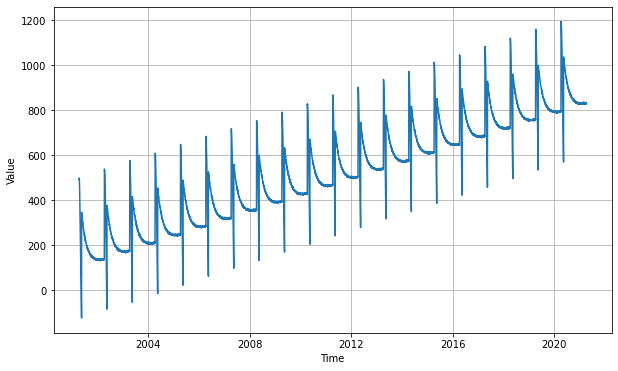

In [7]:
plt.figure(figsize=(10, 6))
plot_series(series[0], series[1])
plt.show()

In [9]:
m = NeuralProphet(
    n_lags=12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,
    learning_rate=1.0,
)
metrics = m.fit(df, freq='1d')

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|██████████| 10/10 [00:01<00:00,  5.70it/s, SmoothL1Loss=0.000549, MAE=12.5, MSE=1.09e+3, RegLoss=0]


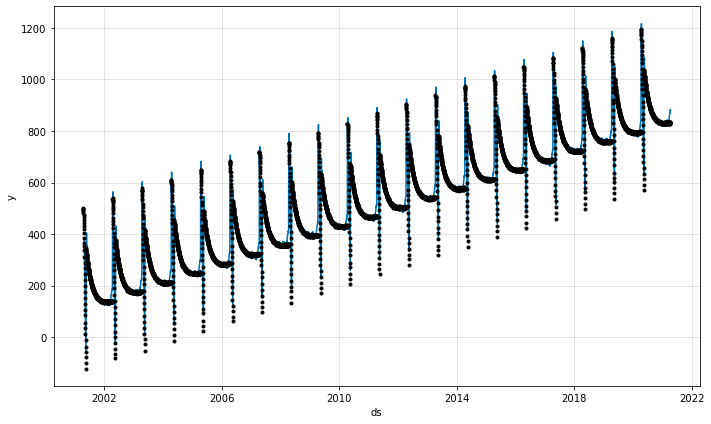

In [10]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

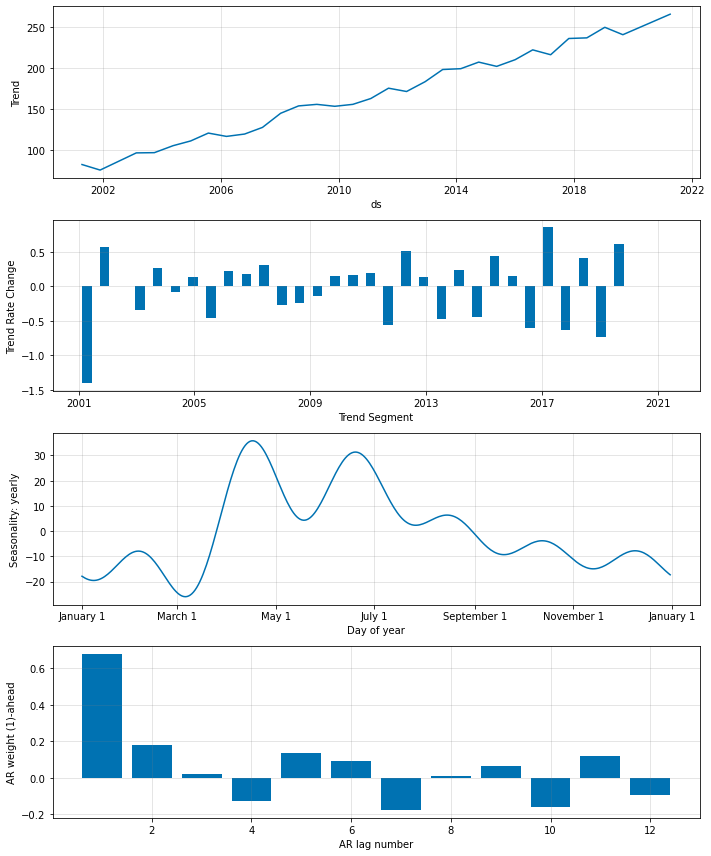

In [11]:
# fig_comp = m.plot_components(forecast)
m = m.highlight_nth_step_ahead_of_each_forecast(1) # temporary workaround to plot actual AR weights
fig_param = m.plot_parameters()

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
Epoch[10/10]: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s, SmoothL1Loss=0.00167, MAE=36.7, MSE=3.31e+3, RegLoss=0]


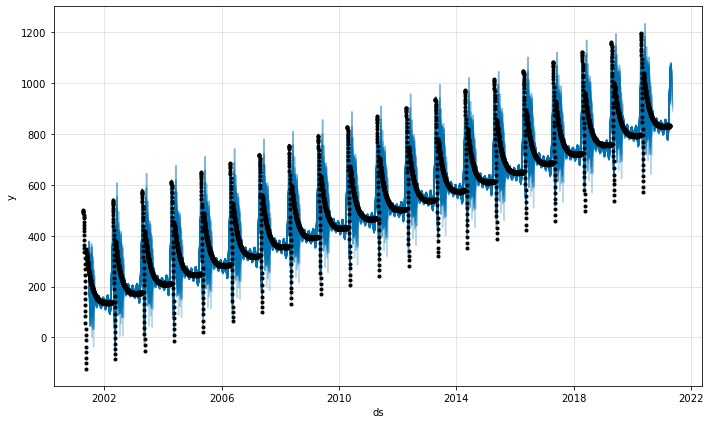

In [12]:
m = NeuralProphet(
    n_lags=6*12,
    n_forecasts=3*12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
    batch_size=64,
    epochs=10,    
    learning_rate=1.0,
)
metrics = m.fit(df, freq='1d')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

In [1]:
def mase():
    raise NotImplementedError

def smape():
    raise NotImplementedError

def mues():
    raise NotImplementedError

def moes():
    raise NotImplementedError
    
def muas():
    raise NotImplementedError

def moas():
    raise NotImplementedError

In [ ]:
5 % 4

In [ ]:
7 % 4